In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns 

<h3> This data comes from Louisville's open data portal at </h3>

https://data.louisvilleky.gov/ 
    
<h3> and more specifically can be pulled from this page </h3>

https://data.louisvilleky.gov/datasets/LOJIC::louisville-metro-ky-the-court-eviction-diversion-program/about </h3> 

In [2]:
# Read in raw data and display first 5 rows

evic_data = pd.read_csv('Louisville_Metro_KY_–The_Court_Eviction_Diversion_Program_Dec_2024.csv')

evic_data.head()

,ID,Council_District,Amount,Household Size,Race,Ethnicity,Gender,DATE,Zip_Code,ObjectId,GlobalID
0,101,2,5795.0,1,African American,Non-Hispanic,Male,9/7/2021,40218,1,5da51adf-ba22-4c48-8c59-cd5664989b46
1,102,2,8325.0,8,White,Non-Hispanic,Male,8/2/2021,40213,2,b7108d8b-f7ef-4973-98b2-a049d06a228a
2,103,2,7456.0,3,African American,Non-Hispanic,Female,8/31/2021,40218,3,f759ac97-0e17-400e-9469-7458fe098d10
3,104,2,2622.0,5,White,Non-Hispanic,Female,7/21/2021,40218,4,c9190510-3be7-4f5c-bbbe-5190b755d738
4,105,2,7704.0,2,African American,Non-Hispanic,Female,7/30/2021,40218,5,e6e8845e-4185-4dac-8457-fef0e813e6ee


In [3]:
# Convert DATE column which is populated with strings to a datetime format (Nick don't feel bad this took me forever to figure
# out as well and isn't perfect)

evic_data['DATE'] = pd.to_datetime(evic_data['DATE'], format='mixed', errors='coerce')
    

In [4]:
# Find dates which were not properly converted (If this is a lot you might have to figure something else out, here it's 0.15%)

evic_data[evic_data['DATE'].isna()]

,ID,Council_District,Amount,Household Size,Race,Ethnicity,Gender,DATE,Zip_Code,ObjectId,GlobalID
1386,1447,15,3000.0,2,Others,Non-Hispanic,Male,NaT,40214,1387,ec671f36-110e-492b-bc72-fc519a836d02
1425,1333,26,6141.0,2,African American,Non-Hispanic,Female,NaT,40220,1426,4055758f-2f59-4e0b-b485-3287b5517812


In [5]:
# Since the # of records that could not be converted to proper dates is small I'm just going to drop them

evic_data.dropna(subset='DATE', inplace=True)

In [6]:
# Sanity check to ensure these dates dropped as I would have expected them to

evic_data[evic_data['DATE'].isna()]

,ID,Council_District,Amount,Household Size,Race,Ethnicity,Gender,DATE,Zip_Code,ObjectId,GlobalID


In [7]:
# Create a month column by isolating the month segment of the date from our new datetime values in the DATE column

evic_data['Month'] = evic_data['DATE'].dt.month_name()

In [8]:
# Drop unnecessary columns

evic_data_cols = evic_data.drop(['ID', 'Ethnicity', 'GlobalID'], axis=1)

# Set an intuitive index (In this case ObjectId which numbers our records 1 to 1503)

evic_data_cols.set_index('ObjectId', inplace=True)

# Rename column 'Amount' to 'Amount_Owed' for clarity in readability

evic_data_cols.rename(columns={'Amount':'Amount_Owed', 'Household Size':'Household_Size'}, inplace=True)

# Rearrange the columns into a more intuitive order

evic_data_cols = evic_data_cols[['Amount_Owed', 'Household_Size', 'Race', 'Gender', 'DATE', 'Month', 'Zip_Code', 'Council_District']]

In [9]:
# I'm going to add a column (this is also referred to as feature engineering) by dividing the sum amount owed in the case by 
# the members of the household. This metric could be used to assess social impact by assessing how much would be owed divided 
# equally amongst the members of the household. 

evic_data_cols['Debt_Per_HH_Member'] = (evic_data_cols['Amount_Owed'] / evic_data_cols['Household_Size']).round(2)

In [10]:
# Display the master DataFrame for final assessment 

evic_data_cols.head(10)
                    
# Mention the handiness of taking a screenshot of this so we have a reference as we're working later 

,Amount_Owed,Household_Size,Race,Gender,DATE,Month,Zip_Code,Council_District,Debt_Per_HH_Member
ObjectId,,,,,,,,,
1,5795.0,1,African American,Male,2021-09-07,September,40218,2,5795.00
2,8325.0,8,White,Male,2021-08-02,August,40213,2,1040.62
3,7456.0,3,African American,Female,2021-08-31,August,40218,2,2485.33
4,2622.0,5,White,Female,2021-07-21,July,40218,2,524.40
5,7704.0,2,African American,Female,2021-07-30,July,40218,2,3852.00
6,7200.0,1,Others,Male,2021-09-07,September,40218,2,7200.00
7,6455.0,1,African American,Male,2021-07-30,July,40218,2,6455.00
8,7670.0,2,African American,Male,2021-10-27,October,40218,2,3835.00
9,11150.0,3,African American,Female,2021-08-25,August,40219,2,3716.67


In [11]:
# I'm just going to include this should you ever want to check column names you can use .columns (with no parentheses)

evic_data_cols.columns

Index(['Amount_Owed', 'Household_Size', 'Race', 'Gender', 'DATE', 'Month',
       'Zip_Code', 'Council_District', 'Debt_Per_HH_Member'],
      dtype='object')

In [12]:
# Find number of null values in each column and datatype of each column

evic_data_cols.info()

# The display of this illustrates that we have no null values across our dataset implying relative cleanliness based on the 
# 100% presence of values 

<class 'pandas.core.frame.DataFrame'>
Index: 1501 entries, 1 to 1503
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Amount_Owed         1501 non-null   float64       
 1   Household_Size      1501 non-null   int64         
 2   Race                1501 non-null   object        
 3   Gender              1501 non-null   object        
 4   DATE                1501 non-null   datetime64[ns]
 5   Month               1501 non-null   object        
 6   Zip_Code            1501 non-null   int64         
 7   Council_District    1501 non-null   int64         
 8   Debt_Per_HH_Member  1501 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 117.3+ KB


In [13]:
# Find summary statistics of all numeric columns (int or float datatype). It's import to note that columns 'Council_District'
# and 'Zip_Code' much of this is meaningless as average, standard deviation, etc are not meaningful for categorical metrics

evic_data_cols.describe()

,Amount_Owed,Household_Size,DATE,Zip_Code,Council_District,Debt_Per_HH_Member
count,1501.000000,1501.000000,1501,1501.000000,1501.000000,1501.000000
mean,6500.910153,2.119254,2021-09-25 21:47:36.495669504,40220.391073,10.846769,4210.034937
min,96.000000,1.000000,2021-07-01 00:00:00,40059.000000,0.000000,24.000000
25%,3300.000000,1.000000,2021-08-11 00:00:00,40210.000000,4.000000,1612.600000
50%,6311.000000,2.000000,2021-09-23 00:00:00,40215.000000,10.000000,3230.330000
75%,8550.000000,3.000000,2021-11-01 00:00:00,40219.000000,17.000000,5948.250000
max,26766.000000,10.000000,2022-11-12 00:00:00,40299.000000,26.000000,26766.000000
std,3949.049728,1.379288,NaN,27.318339,7.807379,3515.147517


In [14]:
# Investigate the amount owed by those facing evication by zip code using .groupby() and sorting descending with .sort_values()

evic_data_cols.groupby('Zip_Code')['Amount_Owed'].mean().round(2).sort_values(ascending=False)

Zip_Code
40059    24612.50
40205    10228.87
40245     9971.78
40223     9402.99
40228     9130.45
40222     8486.49
40241     7935.14
40299     7822.87
40220     7710.28
40206     7385.39
40229     7349.38
40272     7212.42
40291     7184.06
40204     7133.78
40243     7076.90
40211     6864.46
40212     6819.09
40207     6675.13
40216     6632.49
40215     6606.63
40242     6499.71
40208     6400.21
40214     6224.43
40218     6084.02
40213     6074.53
40203     6003.37
40209     5993.50
40217     5828.79
40219     5818.58
40258     5510.28
40210     4921.12
40118     3481.49
40202     2905.46
40225     2738.63
Name: Amount_Owed, dtype: float64

<Axes: xlabel='Zip_Code', ylabel='Amount_Owed'>

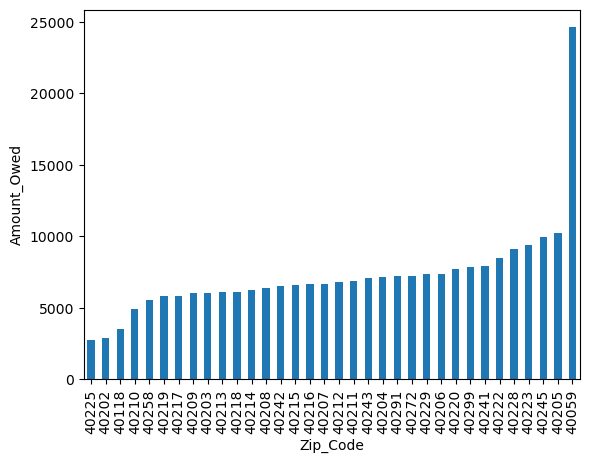

In [15]:
# The above has the information we're interested in but isn't very easy to interpret at a glance. Let's improve on that 
# presentation by creating a quick bar chart 

evic_data_cols.groupby('Zip_Code')['Amount_Owed'].mean().round(2).sort_values().plot(kind='bar', ylabel='Amount_Owed')

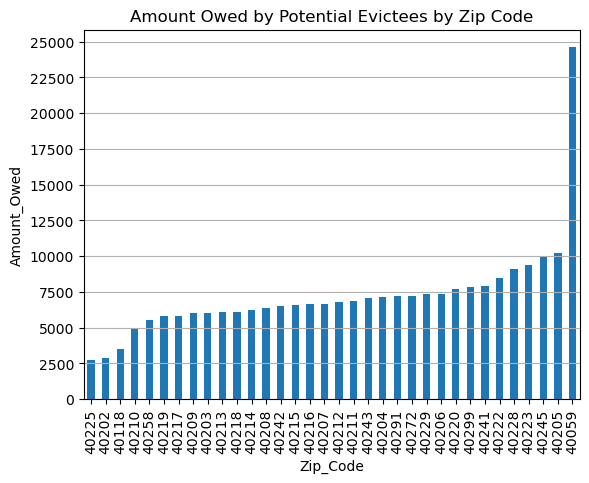

In [16]:
# Now let's add some horizonal gridlines and increase the frequency of the ticks on the y axis to improve interpretability

fig, ax = plt.subplots()

fig = evic_data_cols.groupby('Zip_Code')['Amount_Owed'].mean().round(2).sort_values().plot(kind='bar', ylabel='Amount_Owed',
                                                                                    yticks=range(0, 27500, 2500))
plt.title('Amount Owed by Potential Evictees by Zip Code')

ax.grid(axis='y')

<h3> It appears there is a clear outlier here in 40059 where the amounted owed by potential evictees is 2.5x the next highest zip </h3>

In [17]:
# Ok. I feel like I know a bit more about the distribution of amount owed by potential evictees by zip code, but I'm interested
# in why 40059 has an amount nearly 2.5x the next highest zip code. Let's look into this by isolating the 40059 records.

evic_data_cols[evic_data_cols['Zip_Code'] == 40059]

# This doesn't tell us a ton as there are only two records but I do notice that they are both Males with a household size of 1.

,Amount_Owed,Household_Size,Race,Gender,DATE,Month,Zip_Code,Council_District,Debt_Per_HH_Member
ObjectId,,,,,,,,,
1029,26400.0,1,White,Male,2021-11-01,November,40059,16,26400.0
1030,22825.0,1,Mixed Race,Male,2021-09-17,September,40059,16,22825.0


In [18]:
# Let's investigate the highest amounts owed to see if these 40059 records are truly wild outliers vs other individual records

evic_data_cols.sort_values('Amount_Owed', ascending=False).head(10)

,Amount_Owed,Household_Size,Race,Gender,DATE,Month,Zip_Code,Council_District,Debt_Per_HH_Member
ObjectId,,,,,,,,,
649,26766.00,1,White,Male,2021-11-03,November,40299,11,26766.00
1029,26400.00,1,White,Male,2021-11-01,November,40059,16,26400.00
272,25445.00,1,African American,Male,2021-09-09,September,40202,4,25445.00
53,23793.00,4,White,Female,2021-10-22,October,40211,4,5948.25
1440,22977.00,1,White,Female,2021-10-25,October,40291,26,22977.00
1037,22938.64,3,Mixed Race,Male,2021-11-01,November,40241,17,7646.21
1030,22825.00,1,Mixed Race,Male,2021-09-17,September,40059,16,22825.00
874,21448.35,1,White,Female,2021-10-08,October,40229,13,21448.35
840,21225.00,2,African American,male,2021-09-05,September,40299,20,10612.50


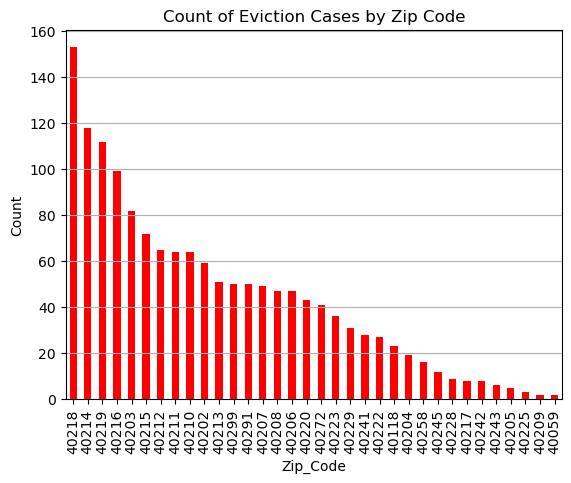

In [19]:
# Maybe taking a look at the # of potential eviction cases by zip code can help us understand how 40059 is standing out.

fig, ax = plt.subplots()

fig = evic_data_cols.groupby('Zip_Code')['Amount_Owed'].count().sort_values(ascending=False).plot(kind='bar', ylabel='Count', 
                                                                                                  color='red')
plt.title('Count of Eviction Cases by Zip Code')

ax.grid(axis='y')

<h3> Noting that the number of potential evictees in 40059 is the lowest in the dataset this would make the average for that zip code susceptible to being wildly driven by lone records. </h3>

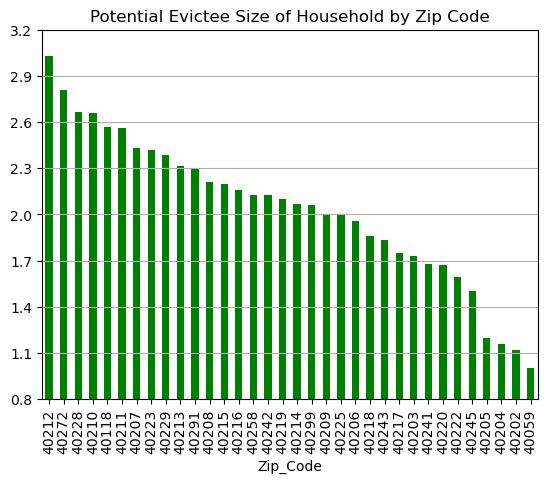

In [20]:
# These will be used for custom y-axis ticks later on

custom_range = [0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2]

# Set up the matplotlib plot (for those who don't know pandas borrows some methods from matplotlib)

fig, ax = plt.subplots()

evic_data_cols.groupby('Zip_Code')['Household_Size'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                              ylim=(0.8, 3.2),
                                                                                              yticks=custom_range,
                                                                                              color='green')

plt.title('Potential Evictee Size of Household by Zip Code')

ax.grid(axis='y')

<h3> The noticeable trends in size of household for potential evictees is this time more apparent on the low side, showcasing 40059 as the shortest bar at an even 1.0. </h3>

<h3> It's safe to say analyzing trends by zip codes that 40059 is known to have a small number of single member households that owe large amounts to avoid eviction. These seem like low social impact cases that should be reviewed. </h3> 

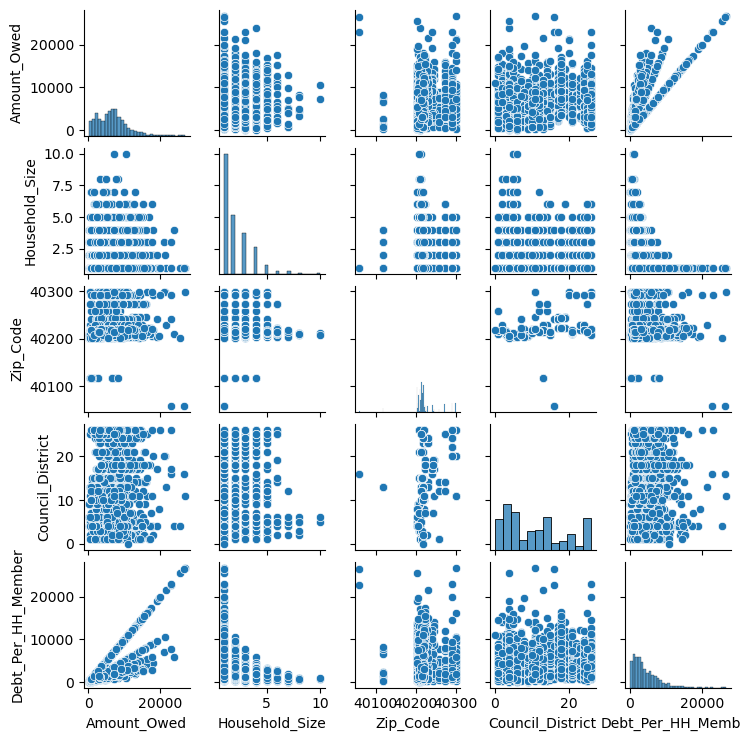

In [21]:
# This is mostly to illustrate what seaborn pairplots looks like. I'll talk a bit in class about how to interpret this

sns.pairplot(evic_data_cols, height=1.5)